In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

basepath = os.path.dirname(os.path.abspath('__file__'))
datapath = basepath + '/data/hugh-murray/'
readfile1 = 'chapter1/chapter1-processed.csv'
readfile2 = 'chapter2/chapter2-processed.csv'
readfile3 = 'chapter3/chapter3-processed.csv'
readfile_total = 'chapters-combined-processed.csv'

df1 = pd.read_csv(datapath + readfile1,sep='\t',encoding='ISO-8859-1')
df2 = pd.read_csv(datapath + readfile2,sep='\t',encoding='ISO-8859-1')
df3 = pd.read_csv(datapath + readfile3,sep='\t',encoding='ISO-8859-1')
df_total = pd.read_csv(datapath + readfile_total,sep=',',encoding='ISO-8859-1')

def handle_empty_values(df):
    df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
    df.reset_index()
    return df
    
df1 = handle_empty_values(df1)
df2 = handle_empty_values(df2)
df3 = handle_empty_values(df3)
df_total = handle_empty_values(df_total)
df_total.head(10)



,chapterNo,chapterTitle,sectionNo,sectionTitle,sentence,sentence_cleaned
0,1,PART 1,1,Power and Magnificence of Kublai,Now I am to give you a wonderful account of th...,give wonderful account greatest king tartars s...
1,1,PART 1,1,Power and Magnificence of Kublai,"That name is assuredly well merited, since he ...",name assuredly well merited since powerful peo...
2,1,PART 1,1,Power and Magnificence of Kublai,Whosoever descends in the direct line from Gen...,whosoever descends direct line gengis entitled...
3,1,PART 1,1,Power and Magnificence of Kublai,He began to reign in the year of our Lord 1256...,began reign year lord 1256and maintained domin...
4,1,PART 1,1,Power and Magnificence of Kublai,"His brothers sought to oppose his succession, ...",brothers sought oppose succession bravery righ...
5,1,PART 1,1,Power and Magnificence of Kublai,"t From the beginning of his reign, forty-two y...",beginning reign fortytwo years elapsed present...
6,1,PART 1,1,Power and Magnificence of Kublai,"He is now full eighty-five years old, and befo...",full eightyfive years old accession commanded ...
7,1,PART 1,1,Power and Magnificence of Kublai,But since that time he has joined the army onl...,since time joined army year 1286 tell occasion
8,1,PART 1,10,His magnificent Palace in Kambalu,"He resides in the vast city of Kambalu, three ...",resides vast city kambalu three months year de...
9,1,PART 1,10,His magnificent Palace in Kambalu,"It is a complete square, a mile long on every ...",complete square mile long every side whole fou...


In [90]:
def get_sections(df):
    return df.groupby(["sectionNo","chapterNo"]).size().count()

def get_records(df):
    return df.shape[0]

def average_sentence_per_section(df):
    return df.groupby(["sectionNo","chapterNo"]).size().mean()


list_sections = [get_sections(df1),get_sections(df2), get_sections(df3), get_sections(df_total)]
list_records = [get_records(df1), get_records(df2), get_records(df3), get_records(df_total)]
list_sentence_average = [average_sentence_per_section(df1), average_sentence_per_section(df2), average_sentence_per_section(df3), average_sentence_per_section(df_total)]


In [91]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None,n_gram=None):
    vec = CountVectorizer(ngram_range=(n_gram,n_gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    total_words =sum(freq for word,freq in words_freq)
    total_unique_words = len(words_freq) 
    
    return words_freq[:n],total_words,total_unique_words

    
chapter1_common_words_one_gram,chapter1_total_words,chapter1_unique_words = get_top_n_words(df1['sentence'], 20,1)
chapter2_common_words_one_gram,chapter2_total_words,chapter2_unique_words = get_top_n_words(df2['sentence'], 20,1)
chapter3_common_words_one_gram,chapter3_total_words,chapter3_unique_words = get_top_n_words(df3['sentence'], 20,1)
combine_common_words_one_gram,combine_total_words,combine_unique_words = get_top_n_words(df_total['sentence'], 20,1)

#show_plot(common_words_tri_gram)

list_total_words = [chapter1_total_words ,chapter2_total_words ,chapter3_total_words,combine_total_words ]
list_total_unique_words = [chapter1_unique_words ,chapter2_unique_words ,chapter3_unique_words,combine_unique_words ]

list_of_tuples = list(zip(list_sections,list_records,list_sentence_average,list_total_words,list_total_unique_words))  
    
# Converting lists of tuples into pandas Dataframe.  
df_statistics = pd.DataFrame(list_of_tuples, columns = ['Total Sections', 'Total Sentences','Avg no of sentences','Total words','Total unique words'])  

new_index = pd.Series(['Chapter1', 'Chapter2', 'Chapter3','Total'])

df_statistics.set_index(new_index, inplace = True) 

df_statistics.head().style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'black',                       
                                    'border-color': 'black'})

#for word, freq in common_words:
#    print(word, freq)




,Total Sections,Total Sentences,Avg no of sentences,Total words,Total unique words
Chapter1,81,971,11.9877,26140,3663
Chapter2,51,592,11.6078,14563,2466
Chapter3,61,861,14.1148,20220,3228
Total,193,2424,12.5596,60923,5793


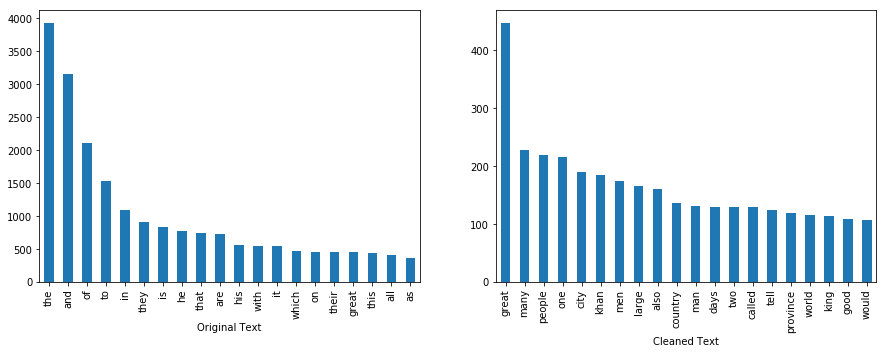

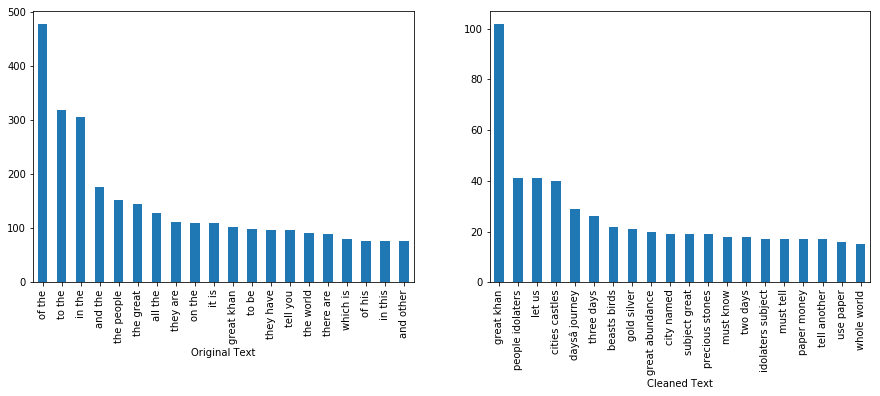

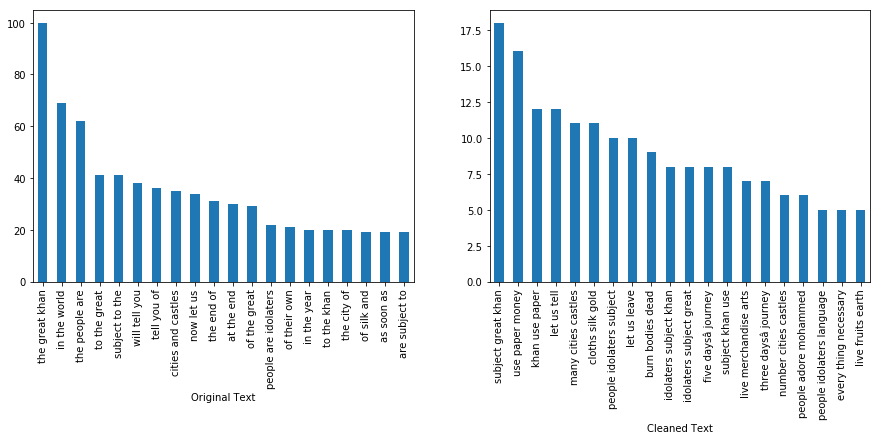

In [92]:

clean_combine_common_words_one_gram,clean_chapter1_total_words,clean_chapter1_unique_words = get_top_n_words(df_total['sentence_cleaned'], 20,1)
#clean_chapter2_common_words_one_gram,clean_chapter2_total_words,clean_chapter2_unique_words = get_top_n_words(df2['sentence_cleaned'], 20,1)
#clean_chapter3_common_words_one_gram,clean_chapter3_total_words,clean_chapter3_unique_words = get_top_n_words(df3['sentence_cleaned'], 20,1)

combine_common_words_bi_gram,chapter1_total_bi_words,chapter1_bi_unique_words = get_top_n_words(df_total['sentence'], 20,2)
combine_common_words_tri_gram,chapter1_total_tri_words,chapter1_tri_unique_words = get_top_n_words(df_total['sentence'], 20,3)

clean_combine_common_words_bi_gram,clean_chapter1_total_bi_words,clean_chapter1_bi_unique_words = get_top_n_words(df_total['sentence_cleaned'], 20,2)
clean_combine_common_words_tri_gram,clean_chapter1_total_tri_words,clean_chapter1_tri_unique_words = get_top_n_words(df_total['sentence_cleaned'], 20,3)

def show_plot(common_words,clean_common_words):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df1 = pd.DataFrame(common_words, columns = ['Original Text' , 'count'])
    df1.groupby('Original Text').sum()['count'].sort_values(ascending=False).plot.bar()
    
    plt.subplot(1,2,2)
    df1 = pd.DataFrame(clean_common_words, columns = ['Cleaned Text' , 'count'])
    df1.groupby('Cleaned Text').sum()['count'].sort_values(ascending=False).plot.bar()

    plt.show()


show_plot(combine_common_words_one_gram,clean_combine_common_words_one_gram)
show_plot(combine_common_words_bi_gram,clean_combine_common_words_bi_gram)
show_plot(combine_common_words_tri_gram,clean_combine_common_words_tri_gram)


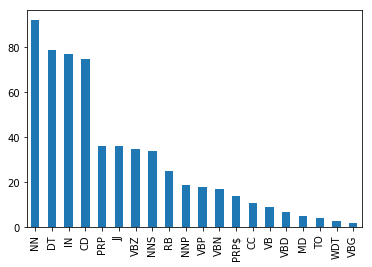

In [77]:
from textblob import TextBlob

blob = TextBlob(str(df1['sentence']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot.bar()
plt.show()


In [ ]:
#df['review_len'] = df['sentence'].astype(str).apply(len)
#df['word_count'] = df['sentence'].apply(lambda x: len(str(x).split()))
